# Importing Necessary Libraries

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls "/content/drive/My Drive/AgriProject"

'Apple Dataset'/  'New Dataset'/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random 
import os
from matplotlib.image import imread
from os import listdir
from PIL import Image

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

# Some Random Healthy leaves Images from the dataset


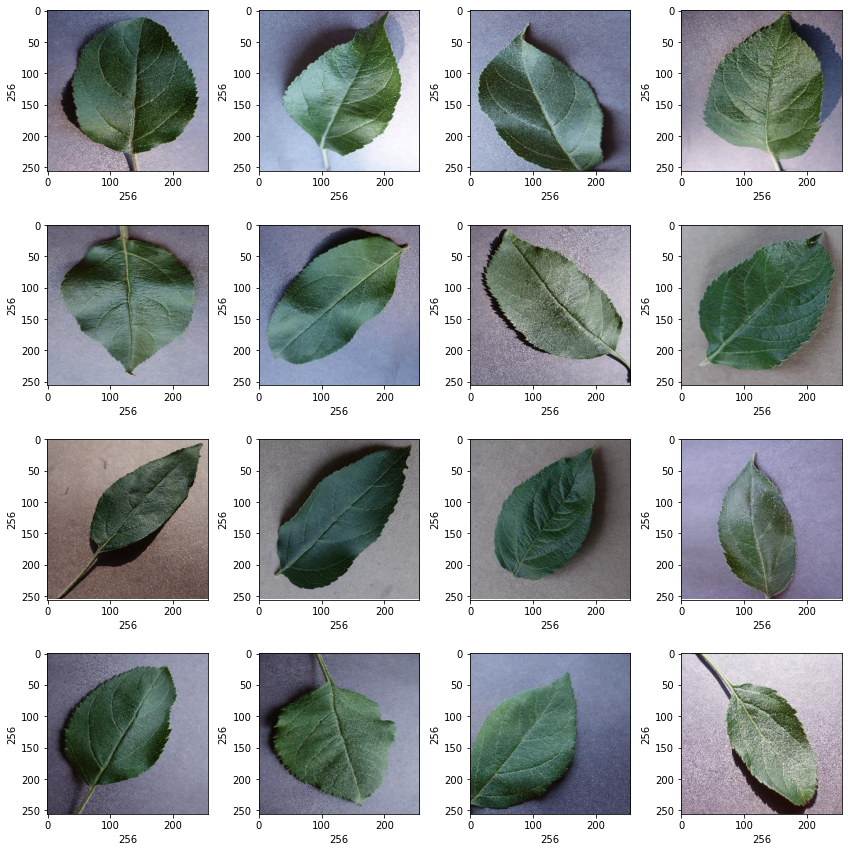

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/AgriProject/New Dataset/healthy"
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' +random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

# Function to convert an Image to an Array so that the model can understand it

In [ ]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
     print(f"Error : {e}")
     return None   

# Reading the Images and labeling them before converting them to array

In [ ]:
dir = "/content/drive/My Drive/AgriProject/New Dataset"
root_dir = listdir(dir)
image_list , label_list = [] , []
all_labels = ['Alternaria leaf spot','Apple_scab','Black Rot' , 'healthy']
binary_labels = [0,1,2,3]
temp = -1

#Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head(7)

1    502
0    323
2    306
3    278
dtype: int64

In [ ]:
#Observing the shape of image
for i in range(0,4):
    print(image_list[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [ ]:
#Shape of Image
label_list = np.array(label_list)
label_list.shape

(1409,)

# Splitting the Data into Train and Test Dataset

In [ ]:
#Test Train split using sklearn.train_test_split
#Train size = 80% and test size = 20% 

x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,train_size=0.8,random_state = 10)

# Normalization

In [ ]:
# Normalization of Images as pixel ranges from (0,255) so divided each image pixel with 255 to normalize the images
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [ ]:
# Converting data to Categorical Data 
#One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 85, 85, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 64)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.0001),metrics=['accuracy'])



In [ ]:
#splitting the data in training and validation dataset
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
#Training the Model
epochs = 40
batch_size = 128
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/40
8/8 [==============================] - 18s 700ms/step - loss: 1.3380 - accuracy: 0.3108 - val_loss: 1.2413 - val_accuracy: 0.4027
Epoch 2/40
8/8 [==============================] - 3s 368ms/step - loss: 1.2395 - accuracy: 0.3707 - val_loss: 1.1370 - val_accuracy: 0.6549
Epoch 3/40
8/8 [==============================] - 3s 369ms/step - loss: 1.1244 - accuracy: 0.4972 - val_loss: 0.9710 - val_accuracy: 0.6327
Epoch 4/40
8/8 [==============================] - 3s 364ms/step - loss: 0.9918 - accuracy: 0.6016 - val_loss: 0.8265 - val_accuracy: 0.6460
Epoch 5/40
8/8 [==============================] - 3s 437ms/step - loss: 0.9501 - accuracy: 0.5871 - val_loss: 0.8330 - val_accuracy: 0.6637
Epoch 6/40
8/8 [==============================] - 3s 363ms/step - loss: 0.8004 - accuracy: 0.6903 - val_loss: 0.7125 - val_accuracy: 0.7389
Epoch 7/40
8/8 [==============================] - 3s 373ms/step - loss: 0.7010 - accuracy: 0.7414 - val_loss: 0.6070 - val_accuracy: 0.7876
Epoch 8/40
8/8 [===

In [ ]:
model.save("/content/drive/My Drive/AgriProject/New Dataset/apple_disease.h5")
#model to json
json_model = model.to_json()
with open("/content/drive/My Drive/AgriProject/New Dataset/apple_model.json","w") as json_file:
  json_file.write(json_model)
#saving the model
model.save_weights("/content/drive/My Drive/AgriProject/New Dataset/apple_disease_weights.h5")  

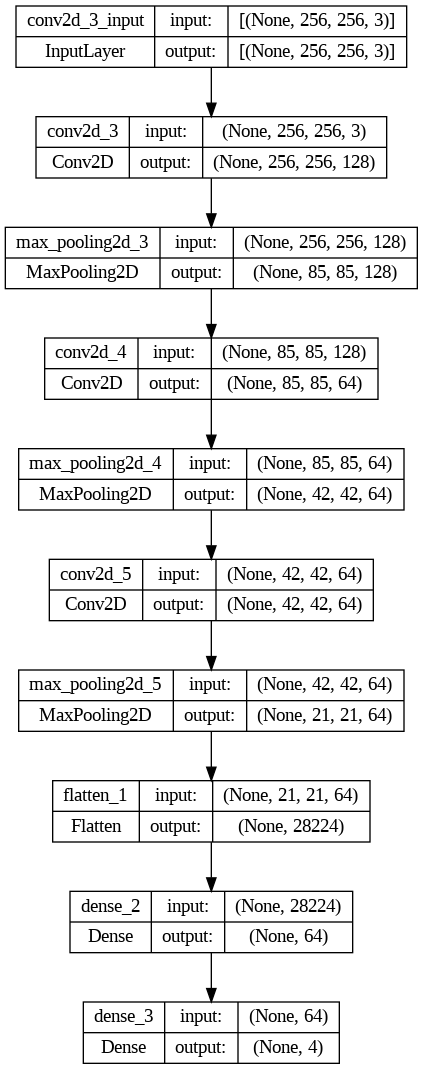

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

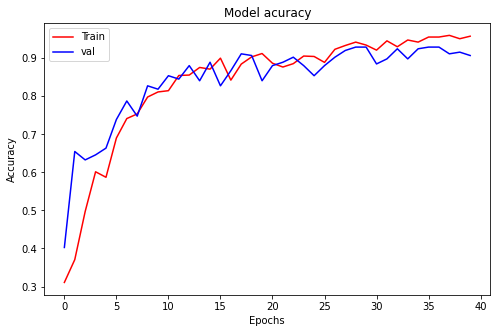

In [ ]:
#Plot the training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','val'])
plt.show()

In [ ]:
#Accuracy of Model
print("Model Accuracy: ")
scores = model.evaluate(x_test,y_test)
print(f"Accuracy: {scores[1]*100}")

Model Accuracy: 
9/9 [==============================] - 1s 85ms/step - loss: 0.3082 - accuracy: 0.9184
Accuracy: 91.84397459030151


# Predicting

In [ ]:
#prediction
y_pred = model.predict(x_test)

9/9 [==============================] - 0s 32ms/step


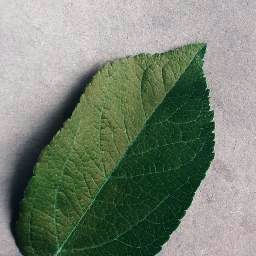

In [ ]:
#plotting the image to compae
img = array_to_img(x_test[1])
img

In [ ]:

print("Originally: ",all_labels[np.argmax(y_test[1])])
print("Predicted: ",all_labels[np.argmax(y_pred[1])])

Originally:  Apple_scab
Predicted:  Apple_scab


In [ ]:
for i in range(10):
  print("Originally: " + all_labels[np.argmax(y_test[i])] + "\t\tPredicted:" + all_labels[np.argmax(y_pred[i])])

 

Originally: Apple_scab		Predicted:Apple_scab
Originally: Apple_scab		Predicted:Apple_scab
Originally: Black Rot		Predicted:Black Rot
Originally: Apple_scab		Predicted:Apple_scab
Originally: Apple_scab		Predicted:Apple_scab
Originally: Apple_scab		Predicted:Apple_scab
Originally: Black Rot		Predicted:Black Rot
Originally: Black Rot		Predicted:Black Rot
Originally: healthy		Predicted:healthy
Originally: healthy		Predicted:healthy
